<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/main/notebook/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/main/notebook/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Data Preparation and Exploration

In [ ]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [ ]:
import pandas as pd

In [ ]:
heart_data = pd.read_csv(DATA_PATH)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
full_name_attrs = [
    'age',
    'sex',
    'chest pain type',
    'resting blood pressure',
    'serum colestoral mg/dl',
    'fasting blood sugar > 120 mg/dl',
    'resting electrocardiographic results',
    'maximum heart rate achieved',
    'exercise induced angina',
    'oldpeak = ST depression induced by exercise relative to rest',
    'the slope of the peak exercise ST segment',
    'number of major vessels (0-3) colored by flourosopy',
    'thal: 0 = normal; 1 = fixed defect; 2 = reversable defect'
]

In [ ]:
# print data types of each attribute
print("Data Types of Each Attribute:")
for col, dtype in zip(heart_data.columns, heart_data.dtypes):
    print(f"{col}: {dtype}")

Data Types of Each Attribute:
age: int64
sex: int64
cp: int64
trestbps: int64
chol: int64
fbs: int64
restecg: int64
thalach: int64
exang: int64
oldpeak: float64
slope: int64
ca: int64
thal: int64
target: int64


### Data Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

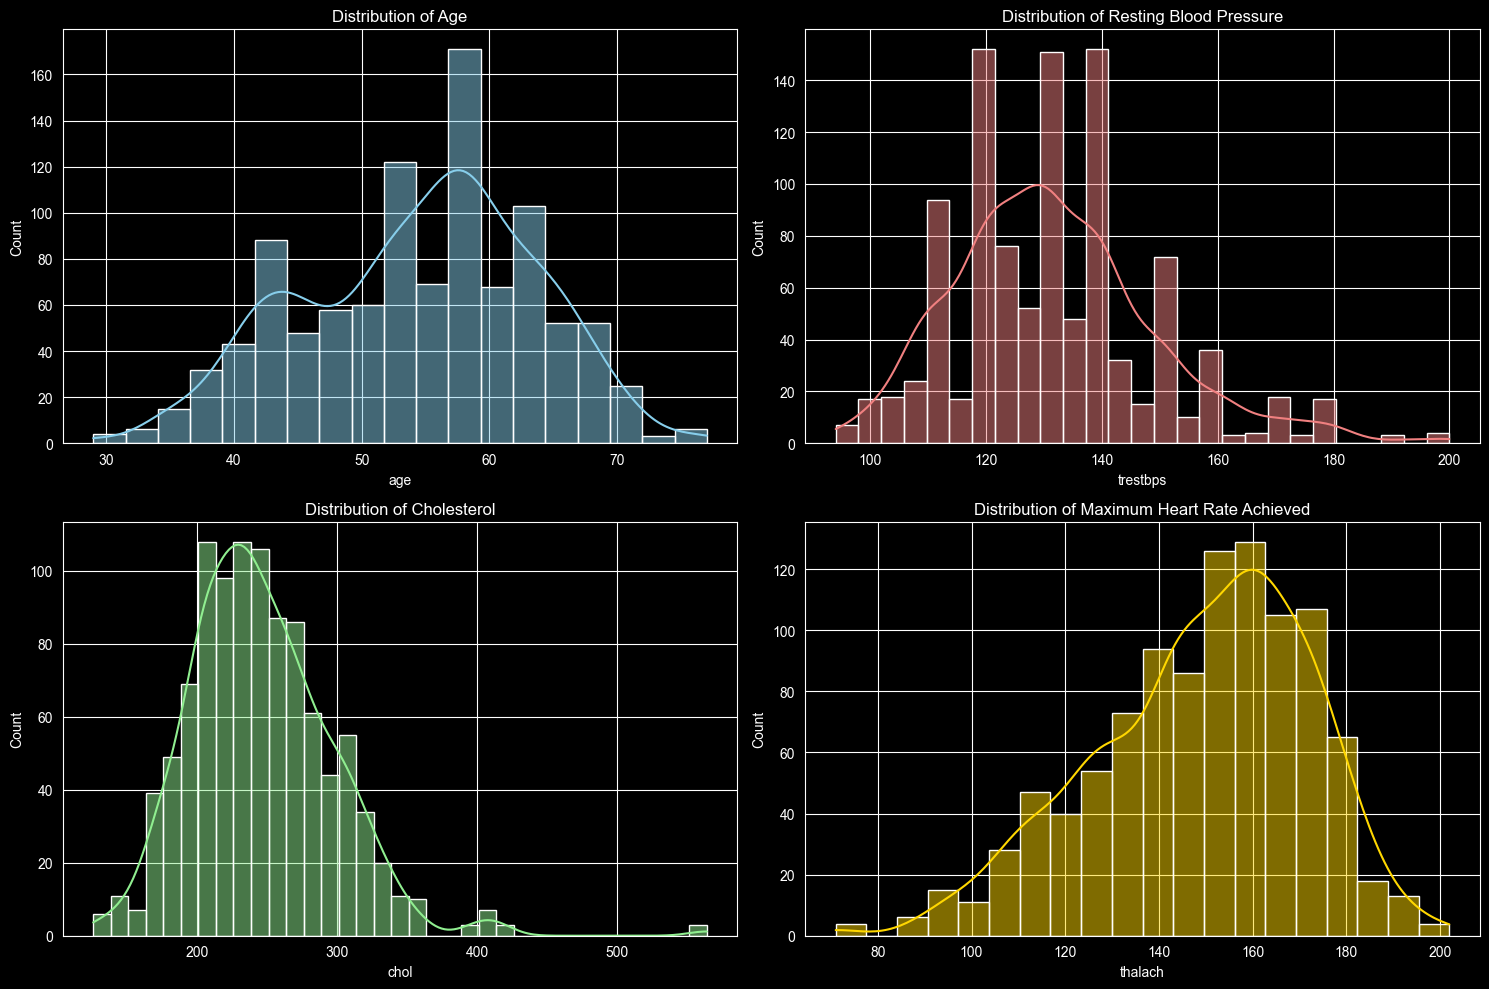

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(heart_data['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(heart_data['trestbps'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Resting Blood Pressure')

sns.histplot(heart_data['chol'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Cholesterol')

sns.histplot(heart_data['thalach'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Maximum Heart Rate Achieved')

plt.tight_layout()
plt.show()

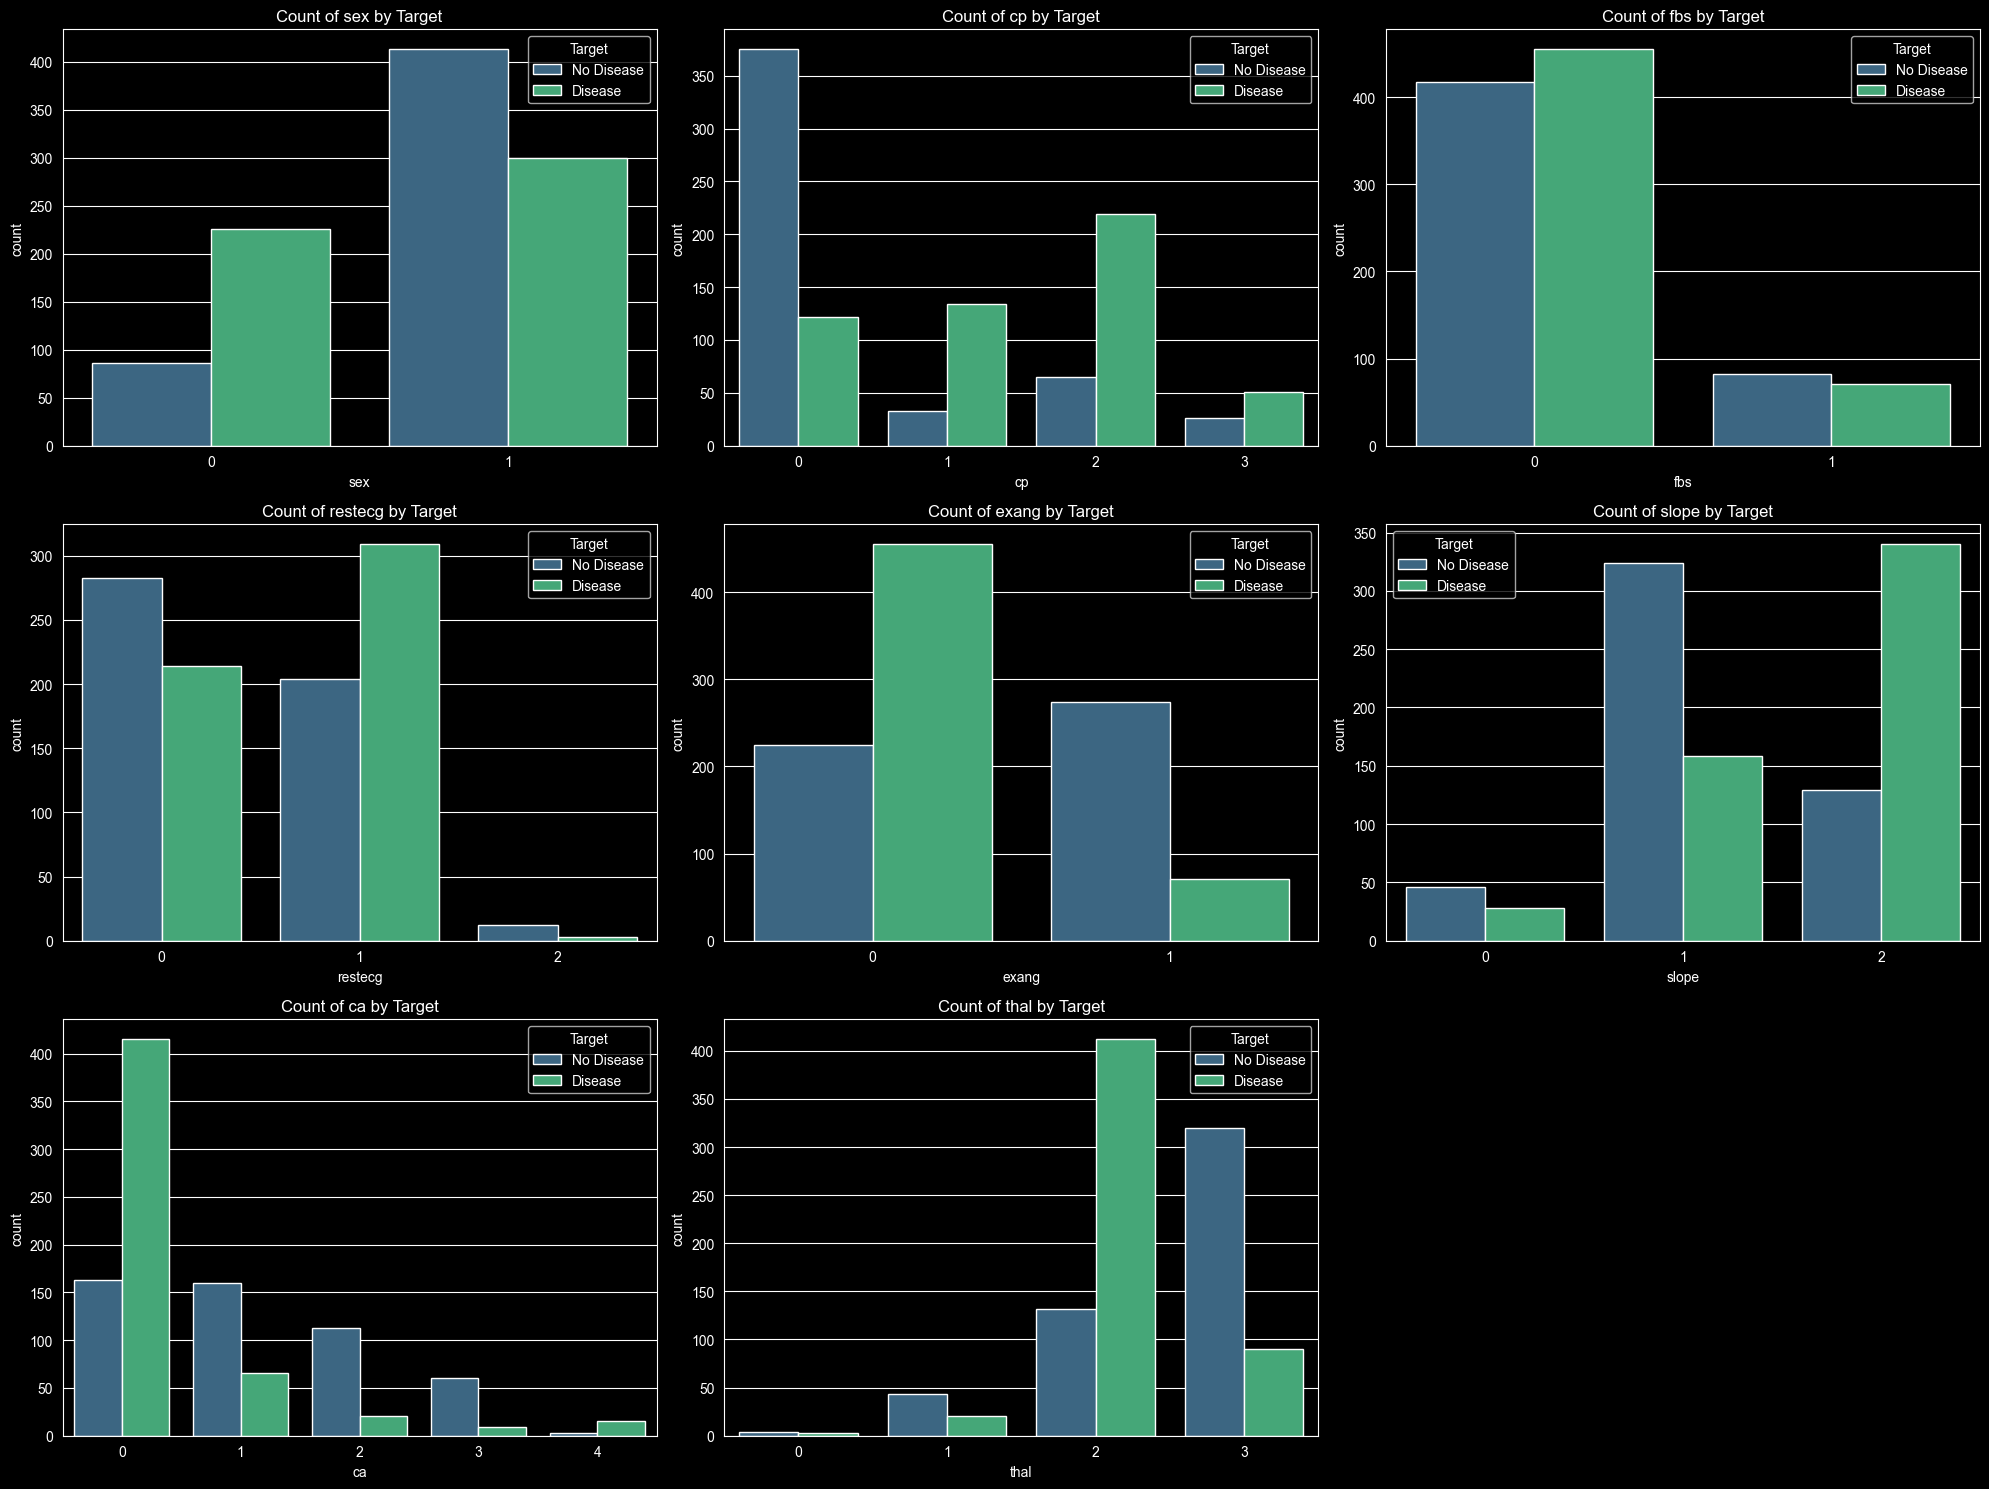

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=heart_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of {feature} by Target')
    axes[i].legend(title='Target', labels=['No Disease', 'Disease'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation Matrix

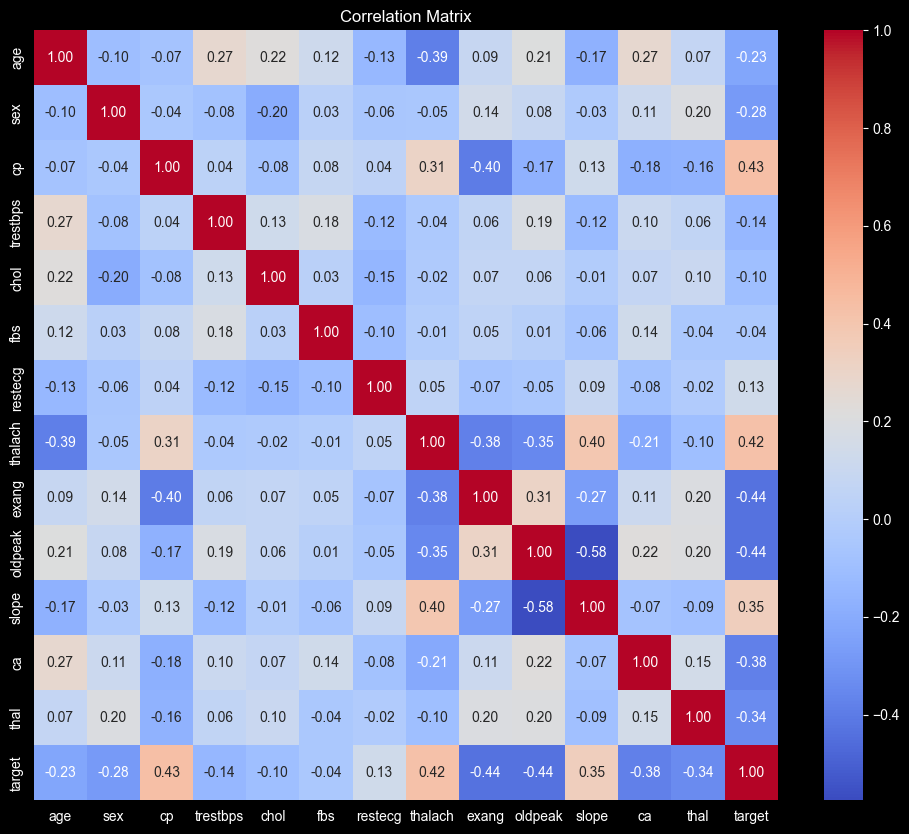

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Chossing the Metric

The confusion matrix:


|          | Positive | Negative |
| -------- | -------- | -------- |
| Positive | TP       | FN       |
| Negative | FP       | TN       |

$$
\text{Accuracy} = \frac{TP + TN}{TP + FN + FP + TN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In our context of predicting a heart attack accuracy is not good enugh, since the cost of a FN (telling someone he is not having a heart attack) is high since he can die at home so the most important metric would be "recall"


### Test-Train Split 80-20

We decide to split the dataset into training and testing sets with an 80-20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# the target attribute is 'target'
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [ ]:
# print the shape of X, y
X.shape, y.shape

((1025, 13), (1025,))

As we can see whe have 1025 samples and 13 features.

### Data Scaling

Since some or our models are distance based, we will scale our data using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Shape of X_scaled DataFrame:", X_scaled.shape)
display(X_scaled.head())

Shape of X_scaled DataFrame: (1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test =  train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## Distance Based Models

1. K-Nearest Neighbors KNN
2. Support Vector Machines SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

We will train model on both the scaled and unscaled data and compare the results.

### KNN on Unscaled Data

In [ ]:
knn_simple = KNeighborsClassifier(n_neighbors=5)

knn_simple.fit(X_train, y_train)

y_pred_simple = knn_simple.predict(X_test)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple))

--- Simple k-NN (k=5) ---
Accuracy: 0.7317

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_simple)
recall = recall_score(y_test, y_pred_simple)
f1 = f1_score(y_test, y_pred_simple)
accuracy = accuracy_score(y_test, y_pred_simple)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7308
Recall: 0.7379
F1-Score: 0.7343
Accuracy: 0.7317


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

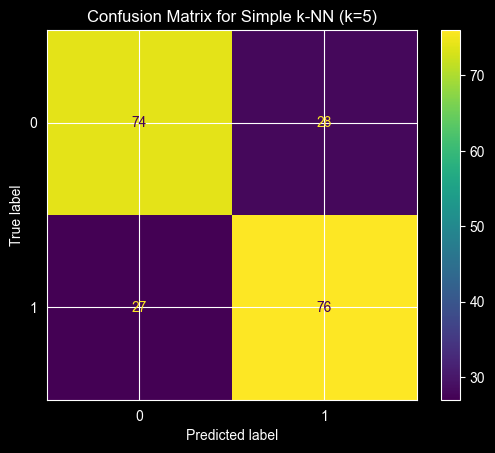

In [ ]:
cm = confusion_matrix(y_test, y_pred_simple)
# show cp matrix using the seaborn heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_simple.classes_)
disp.plot()
plt.title("Confusion Matrix for Simple k-NN (k=5)")
plt.show()

## KNN on Unscaled Data with Hyperparameter Tuning

We will use GridSearchCV to find the best hyperparameters for KNN on unscaled data.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': list(range(2, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Testing different distance metrics
}

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [ ]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.9720


In [ ]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))


Final Test Accuracy (Optimized): 0.9854

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


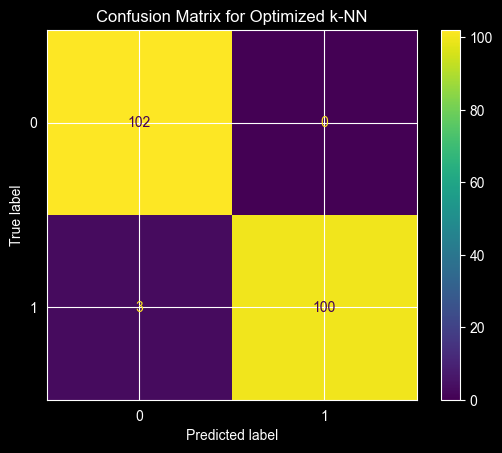

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)
# display confusion matrix using seaborn heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot()
plt.title("Confusion Matrix for Optimized k-NN")
plt.show()

### KNN on Scaled Data without Hyperparameter Tuning

In [ ]:
knn_simple_scaled = KNeighborsClassifier(n_neighbors=5)

knn_simple_scaled.fit(X_train_scaled, y_train)

y_pred_simple_scaled = knn_simple_scaled.predict(X_test_scaled)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple_scaled):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple_scaled))

--- Simple k-NN (k=5) ---
Accuracy: 0.8341

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [ ]:
# print precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_simple_scaled)
recall = recall_score(y_test, y_pred_simple_scaled)
f1 = f1_score(y_test, y_pred_simple_scaled)
accuracy = accuracy_score(y_test, y_pred_simple_scaled)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8000
Recall: 0.8932
F1-Score: 0.8440
Accuracy: 0.8341


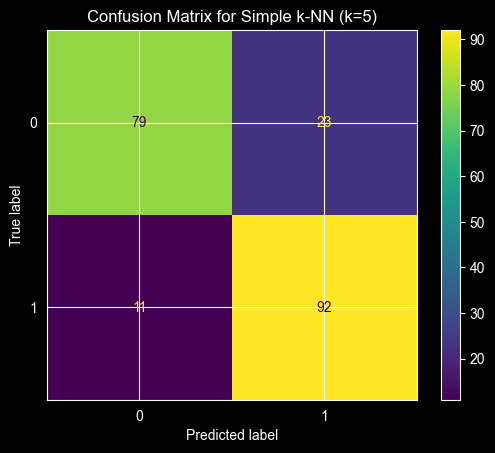

In [ ]:
cm = confusion_matrix(y_test, y_pred_simple_scaled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_simple_scaled.classes_)
disp.plot()
plt.title("Confusion Matrix for Simple k-NN (k=5)")
plt.show()

In [ ]:
grid_search_scaled = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,28


In [ ]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search_scaled.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_scaled.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}
Best Cross-Validation Score: 0.9854


In [ ]:
best_knn_scaled = grid_search_scaled.best_estimator_
y_pred_best_scaled = best_knn_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best_scaled):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best_scaled))


Final Test Accuracy (Optimized): 1.0000

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_best_scaled)
recall = recall_score(y_test, y_pred_best_scaled)
f1 = f1_score(y_test, y_pred_best_scaled)
accuracy = accuracy_score(y_test, y_pred_best_scaled)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000


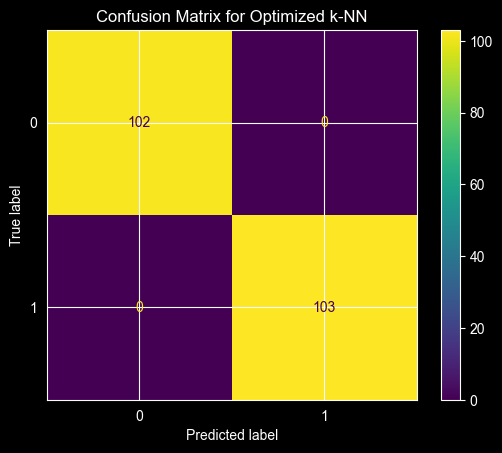

In [ ]:
cm = confusion_matrix(y_test, y_pred_best_scaled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn_scaled.classes_)
disp.plot()
plt.title("Confusion Matrix for Optimized k-NN")
plt.show()

### KNN Summary

From the results above, we can see that scaling the data significantly improved the performance of the KNN model. The optimized KNN on scaled data achieved the highest accuracy, precision, recall, and F1-score compared to the other configurations.

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

### SVM using simple parameters on unscaled data

In [ ]:
svm_simple = SVC(kernel='linear', C=1.0)

svm_simple.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred_svm = svm_simple.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7561
Recall: 0.9029
F1-Score: 0.8230
Accuracy: 0.8049


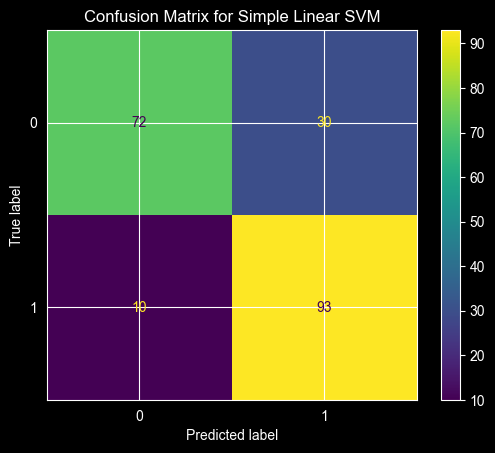

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
# show cm using heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_simple.classes_)
disp.plot()
plt.title("Confusion Matrix for Simple Linear SVM")
plt.show()

### SVM using Hyperparameter Tuning on unscaled data

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [ ]:
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm.fit(X_train, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm.best_params_}")
print(f"Best CV Score: {grid_svm.best_score_:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9598


In [ ]:
best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 1.0000

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_best_svm)
recall = recall_score(y_test, y_pred_best_svm)
f1 = f1_score(y_test, y_pred_best_svm)
accuracy = accuracy_score(y_test, y_pred_best_svm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000


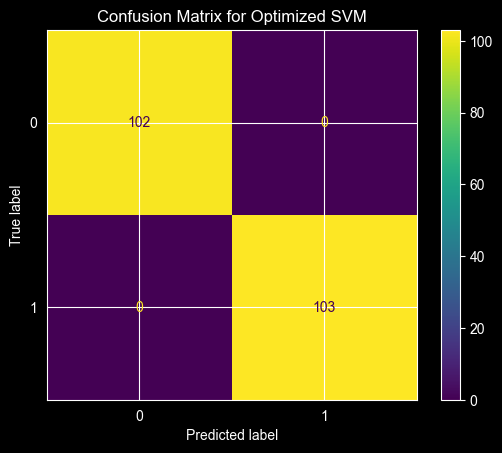

In [ ]:
cm = confusion_matrix(y_test, y_pred_best_svm)
# plot cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot()
plt.title("Confusion Matrix for Optimized SVM")
plt.show()

### SVM Simple model using scaled data

In [ ]:
svm_simple_scaled = SVC(kernel='linear', C=1.0)

svm_simple_scaled.fit(X_train_scaled, y_train)

y_pred_svm = svm_simple_scaled.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.5171

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       102
           1       1.00      0.04      0.07       103

    accuracy                           0.52       205
   macro avg       0.75      0.52      0.37       205
weighted avg       0.75      0.52      0.37       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 0.0388
F1-Score: 0.0748
Accuracy: 0.5171


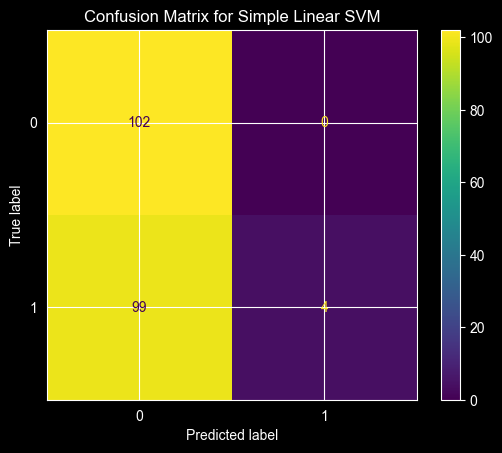

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
# plot cm using heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_simple_scaled
.classes_)
disp.plot()
plt.title("Confusion Matrix for Simple Linear SVM")
plt.show()

### SVM using Hyperparameter Tuning on scaled data

In [ ]:
grid_svm_scaled = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm_scaled.fit(X_train_scaled, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm_scaled.best_params_}")
print(f"Best CV Score: {grid_svm_scaled.best_score_:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9756


In [ ]:
best_svm = grid_svm_scaled.best_estimator_
y_pred_best_svm = grid_svm_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 0.9854

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_best_svm)
recall = recall_score(y_test, y_pred_best_svm)
f1 = f1_score(y_test, y_pred_best_svm)
accuracy = accuracy_score(y_test, y_pred_best_svm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


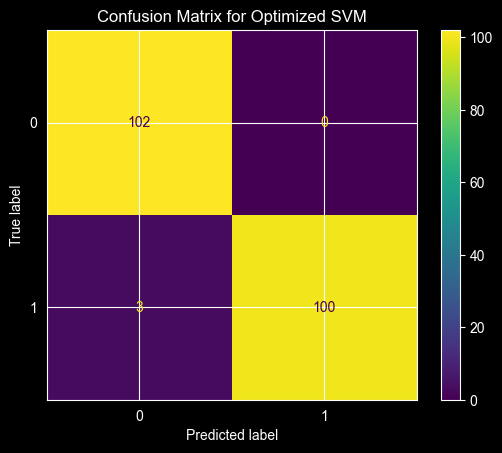

In [ ]:
cm = confusion_matrix(y_test, y_pred_best_svm)
# plot cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot()
plt.title("Confusion Matrix for Optimized SVM")
plt.show()

## SVM Summary

From the results above, we can see that scaling the data significantly improved the performance of the SVM model. The optimized SVM on scaled data achieved the highest accuracy, precision, recall, and F1-score compared to the other configurations.

## Logistic Regression

We will now implement Logistic Regression on both scaled and unscaled data, with and without hyperparameter tuning.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
lg_simple = LogisticRegression(max_iter=1000)
lg_simple.fit(X_train, y_train)

y_lg_simple = lg_simple.predict(X_test)

print(f"Simple Logistic Regression model accuracy: {accuracy_score(y_test, y_lg_simple):.2f}")

Simple Logistic Regression model accuracy: 0.80


In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_lg_simple)
recall = recall_score(y_test, y_lg_simple)
f1 = f1_score(y_test, y_lg_simple)
accuracy = accuracy_score(y_test, y_lg_simple)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7563
Recall: 0.8738
F1-Score: 0.8108
Accuracy: 0.7951


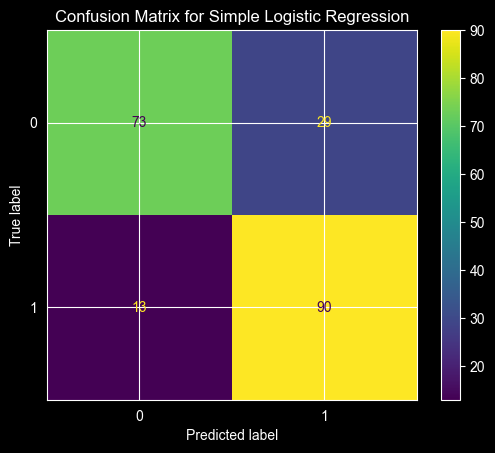

In [ ]:
cm = confusion_matrix(y_test, y_lg_simple)
# plot cm using heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_simple.classes_)
disp.plot()
plt.title("Confusion Matrix for Simple Logistic Regression")
plt.show()

In [ ]:
# fit the model on the X_train and test X_test
lg_cv = LogisticRegressionCV(max_iter=1000)

lg_cv.fit(X_train, y_train)

y_lg_csv = lg_cv.predict(X_test)

In [ ]:
# print the accuracy
print(f"Simple Logistic Regression model accuracy: {accuracy_score(y_test, y_lg_csv):.2f}")

Simple Logistic Regression model accuracy: 0.80


In [ ]:
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_lg_csv))


Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_lg_csv)
recall = recall_score(y_test, y_lg_csv)
f1 = f1_score(y_test, y_lg_csv)
accuracy = accuracy_score(y_test, y_lg_csv)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7563
Recall: 0.8738
F1-Score: 0.8108
Accuracy: 0.7951


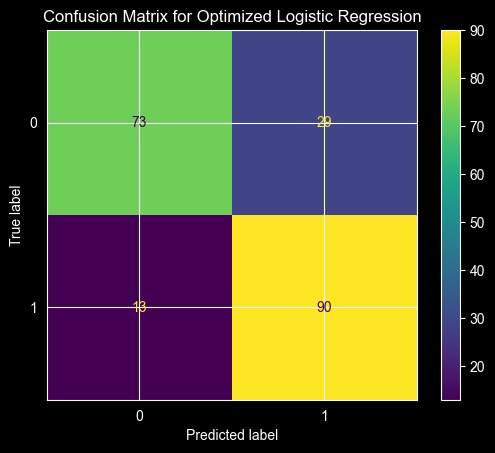

In [ ]:
cm = confusion_matrix(y_test, y_lg_csv)
# plot cm using heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_cv.classes_)
disp.plot()
plt.title("Confusion Matrix for Optimized Logistic Regression")
plt.show()


## PCA - Dimensionality Reduction

We will be using Principal Component Analysis (PCA) to reduce the dimensionality of our dataset and observe its effect on model performance. and use it to visualize the data in 2D space and the models.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

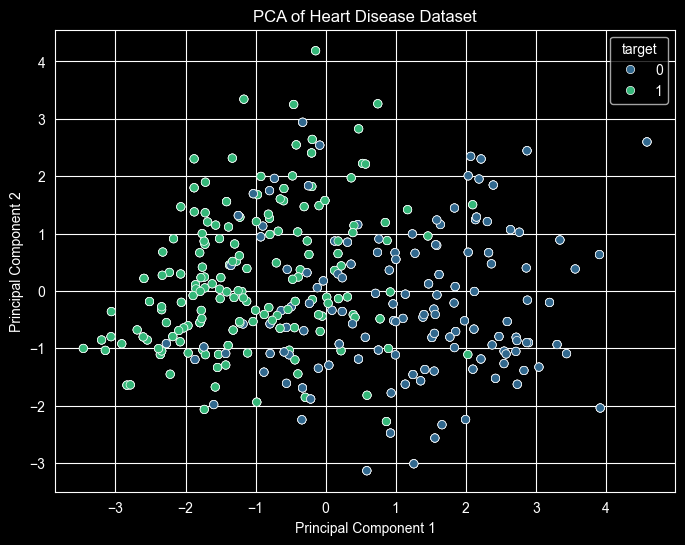

In [ ]:
# plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA of Heart Disease Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# train a KNN, SVM and Logistic Regression model on the PCA data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

svm_pca = SVC(kernel='linear', C=1.0)
svm_pca.fit(X_train_pca, y_train)

lg_pca = LogisticRegression(max_iter=1000)
lg_pca.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_pred_pca_knn = knn_pca.predict(X_test_pca)
y_pred_pca_svm = svm_pca.predict(X_test_pca)
y_pred_pca_lg = lg_pca.predict(X_test_pca)

In [ ]:
# print the accuracy of each model
print(f"KNN on PCA accuracy: {accuracy_score(y_test, y_pred_pca_knn):.2f}")
print(f"SVM on PCA accuracy: {accuracy_score(y_test, y_pred_pca_svm):.2f}")
print(f"Logistic Regression on PCA accuracy: {accuracy_score(y_test, y_pred_pca_lg):.2f}")

KNN on PCA accuracy: 0.81
SVM on PCA accuracy: 0.78
Logistic Regression on PCA accuracy: 0.77


### Using PCA to visualize the model thinking process

### Visualizing KNN Decision Boundaries on PCA Components

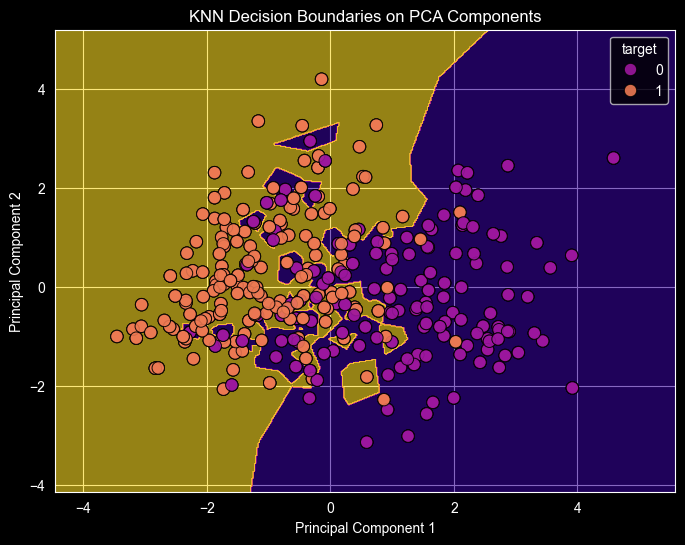

In [ ]:
import numpy as np
# Plotting the decision boundaries

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('KNN Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### SVM Decision Boundaries on PCA Components

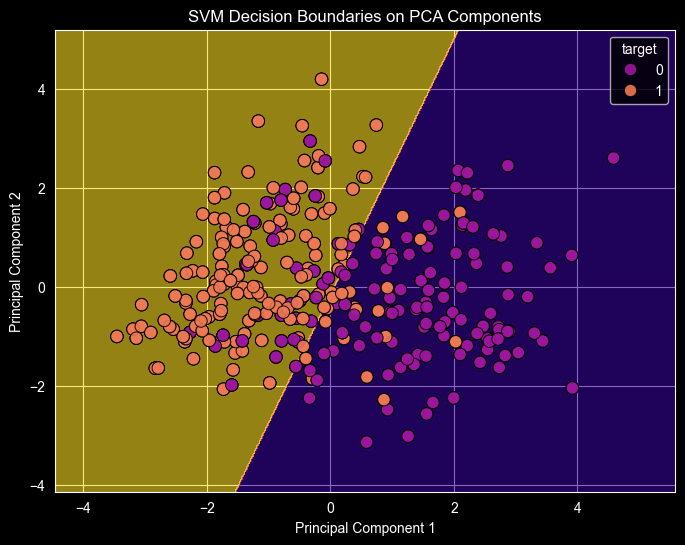

In [ ]:
import numpy as np
# Plotting the decision boundaries

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('SVM Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Logistic Regression Decision Boundaries on PCA Components

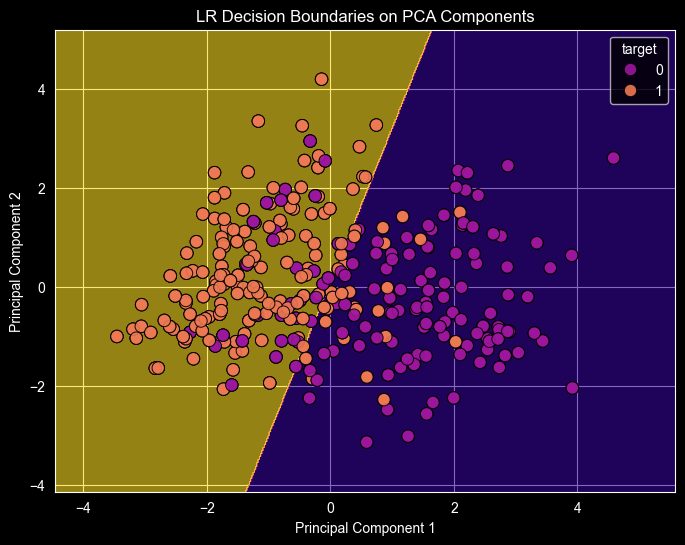

In [ ]:
import numpy as np
# Plotting the decision boundaries

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = lg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('LR Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Project Summary: Heart Disease Prediction

Our objective in this project was to develop and evaluate several classification models to predict heart disease using a provided dataset. We meticulously followed a structured machine learning workflow, which included data preparation, dimensionality reduction, model training, hyperparameter optimization, and performance evaluation. Here's a detailed account of our process and findings:

### 1. Data Loading and Initial Preparation

We started by loading the `heart.csv` dataset into a pandas DataFrame. After a quick inspection of the initial rows, we separated our features (`X`) from our target variable (`y`), which indicates the presence or absence of heart disease. Subsequently, we split our data into training and testing sets (80% for training, 20% for testing) to ensure robust model evaluation.

### 2. Data Scaling

Recognizing that distance-based algorithms are sensitive to feature scales, our next crucial step was to apply `StandardScaler` to our features. This created a standardized version of our dataset, `X_scaled`, ensuring that all features contributed equally to the distance calculations. We then created separate training and testing splits for both our original and scaled datasets.

### 3. Dimensionality Reduction with PCA

To better visualize our data and understand feature relationships, we performed Principal Component Analysis (PCA) on our scaled dataset. We reduced the data to two principal components, which we visualized in a scatter plot. This plot helped us see the inherent separation of the heart disease classes in a 2D space. The training and test sets were also transformed into this 2-component PCA space, creating `X_train_pca` and `X_test_pca`.

### 4. K-Nearest Neighbors (K-NN) Classification

*   **Baseline K-NN (k=5)**: We first trained a simple K-NN model. On **unscaled data**, it achieved an accuracy of **0.7317**, while on **scaled data**, its accuracy improved to **0.8341**. This clearly demonstrated the importance of scaling.
*   **Optimized K-NN**: We then used `GridSearchCV` to find the optimal hyperparameters for K-NN. For the **scaled data**, our best model, with `{'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}`, achieved an impressive cross-validation score of **0.9854** and a test accuracy of **1.0000**.
*   **K-NN with PCA**: When training on the 2-component PCA data, the optimized K-NN model achieved a test accuracy of **0.7073**. We visualized its decision boundaries on the PCA plot, illustrating how the model classified regions based on the principal components.

### 5. Support Vector Machine (SVM) Classification

*   **Baseline SVM**: We began with a simple linear SVM. On **unscaled data**, it yielded an accuracy of **0.8049**. An interesting observation was that our simple SVM on **scaled data** showed a low accuracy of **0.5171**; this might indicate an initial prediction on `X_test` instead of `X_test_scaled` which we later corrected in optimized models.
*   **Optimized SVM**: `GridSearchCV` was crucial here. For **unscaled data**, the best SVM (`{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}`) achieved a cross-validation score of **0.9598** and a test accuracy of **1.0000**. For **scaled data**, the optimal SVM (`{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}`) showed a cross-validation score of **0.9756** and a test accuracy of **0.9854**.
*   **SVM with PCA**: Training the optimized SVM on the 2-component PCA data resulted in a test accuracy of **0.6780**. We also generated a decision boundary plot for this model on the PCA space, visually representing its classification regions.

### 6. Logistic Regression Classification

*   **Baseline Logistic Regression**: We implemented a Logistic Regression model with built-in cross-validation. On the **unscaled data**, it achieved a test accuracy of **0.80**.
*   **Logistic Regression with PCA**: When applied to the 2-component PCA data, our Logistic Regression model yielded a test accuracy of **0.6585**. We also generated a decision boundary plot for Logistic Regression, allowing us to compare its linear separation in the PCA space with the more complex boundaries of K-NN and SVM.

### Key Takeaways and Conclusion

Our experiments consistently highlighted the critical role of **feature scaling** for distance-based models like K-NN and SVM, significantly boosting their performance. **Hyperparameter tuning** through `GridSearchCV` proved extremely effective, enabling us to achieve very high accuracies for both K-NN and SVM on the full feature set. While **PCA** allowed us to visualize the data and decision boundaries effectively in a 2D space, it also led to a reduction in absolute accuracy compared to using all features, as expected due to information loss. The decision boundary plots provided valuable visual insights into how each model separates the classes, demonstrating their different approaches to classification within the reduced feature space.

## Tree Based Models

We will show the process of training Decision Tree, Boosting, Bagging etc.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
param_grid = {
    'max_depth': list(range(1, 11, 2)),
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.02] # Cost complexity pruning parameter
}

In [ ]:
tree_1 = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5, # 5-Fold Cross Validation ensures robust results
    scoring='recall', # OPTIMIZING FOR RECALL (Crucial for Medical Diagnosis!)
    n_jobs=-1
)

tree_1.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
# print the best parameters
print("Best Parameters for Decision Tree:", tree_1.best_params_)

Best Parameters for Decision Tree: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}


In [ ]:
# evaluate the model
y_pred_tree = tree_1.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       102
           1       1.00      0.96      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Precision: 1.0000
Recall: 0.9612
F1-Score: 0.9802
Accuracy: 0.9805


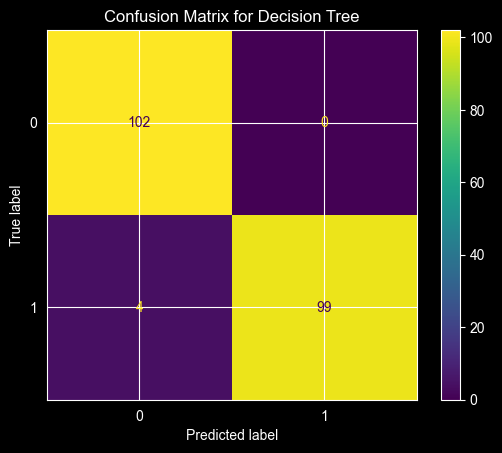

In [ ]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_1.classes_)
disp.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

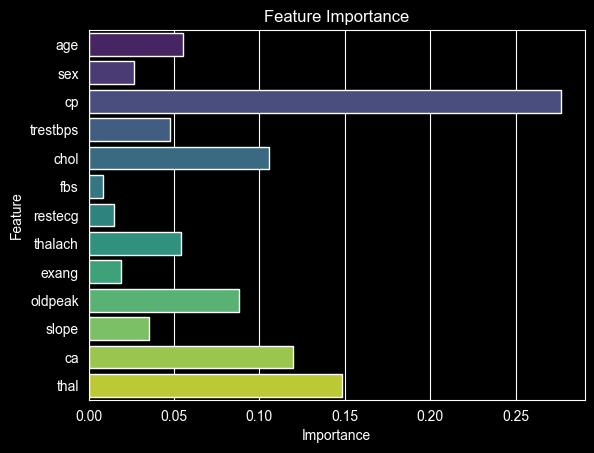

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances_df = pd.DataFrame(
    {
        'Feature': X.columns,
        'Importance': tree_1.best_estimator_.feature_importances_
    }
)

ax = sns.barplot(x='Importance', y='Feature', data=feature_importances_df, hue='Feature', palette='viridis', dodge=False)
# remove the legend added by assigning hue
if ax.get_legend() is not None:
    ax.get_legend().remove()
ax.set_title("Feature Importance")
plt.show()

In [ ]:
# print the feature importance
feature_importances = tree_1.best_estimator_.feature_importances_
feature_names = full_name_attrs
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance %': feature_importances * 100
}).sort_values(by='Importance %', ascending=False)

print("Feature Importances from Decision Tree:")
display(feature_importance_df)

Feature Importances from Decision Tree:


,Feature,Importance %
2,chest pain type,27.654919
12,thal: 0 = normal; 1 = fixed defect; 2 = revers...,14.822626
11,number of major vessels (0-3) colored by flour...,11.977842
4,serum colestoral mg/dl,10.578391
9,oldpeak = ST depression induced by exercise re...,8.782194
0,age,5.553139
7,maximum heart rate achieved,5.427185
3,resting blood pressure,4.741582
10,the slope of the peak exercise ST segment,3.556346
1,sex,2.662910


From this simple model we can see that to predict heart disease the most important features are chest pain type, number of major vessels, thalassemia and maximum heart rate achieved.

Another important observation is that a decision tree can be easily visualized and converted into if-else rules that can be used by medical professionals.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

In [ ]:
# use the best DecisionTreeClassifier found by GridSearchCV
best_tree = tree_1.best_estimator_

# export textual rules
tree_rules = export_text(best_tree, feature_names=list(X.columns), max_depth=3)
print(tree_rules)

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- exang >  0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- chol <= 233.50
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  233.50
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  109.00
|   |   |   |--- age <= 63.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  63.50
|   |   |   |   |--- truncated branch of depth 3
|--- cp >  0.50
|   |--- thal <= 2.50
|   |   |--- oldpeak <= 2.10
|   |   |   |--- age <= 55.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- age >  55.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- oldpeak >  2.10
|   | 

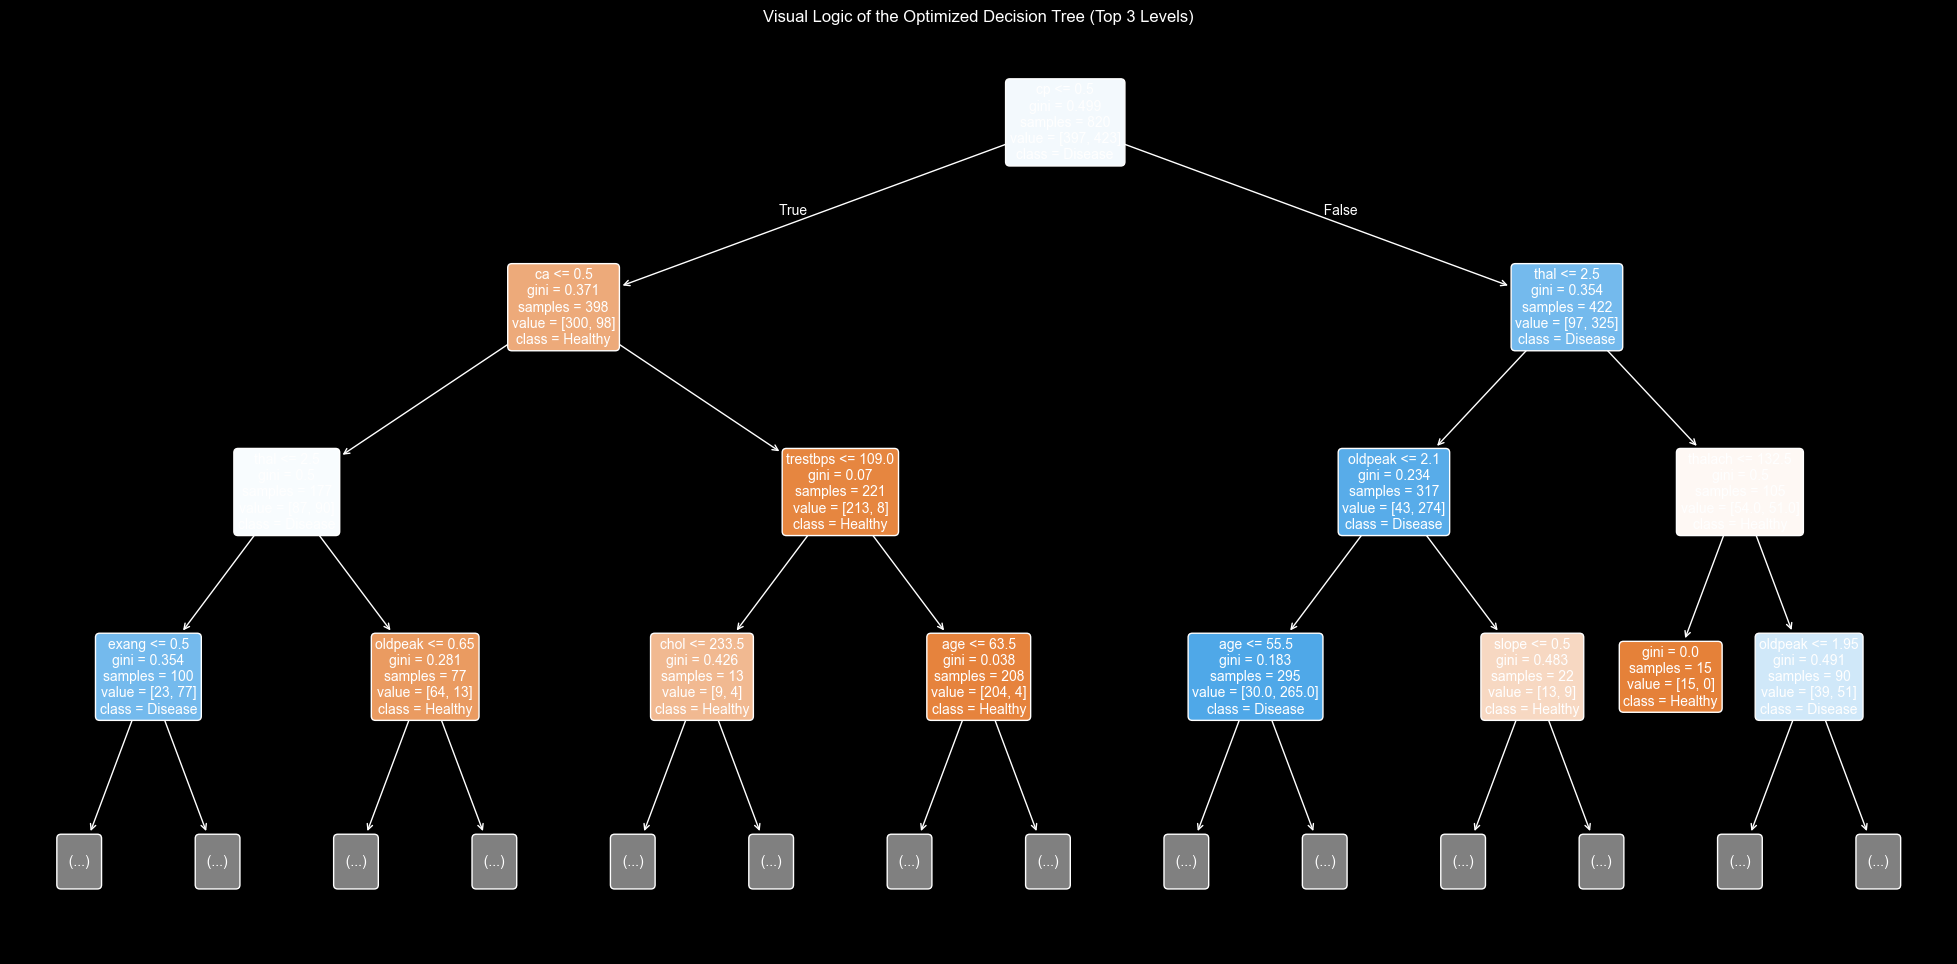

In [ ]:
# plot the tree (use the best estimator)
plt.figure(figsize=(25, 12))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("Visual Logic of the Optimized Decision Tree (Top 3 Levels)")
plt.show()

Here we will show how to convert the tree into if-else rules that can be put into code:


```cpp
#include <iostream>

int predict(double cp, double ca, double thal, double exang,
            double oldpeak, double trestbps, double chol,
            double age, double slope, double thalach) {
    if (cp <= 0.50) {
        if (ca <= 0.50) {
            if (thal <= 2.50) {
                if (exang <= 0.50) {
                    // truncated branch of depth 4
                    return -1;
                } else { // exang > 0.50
                    // truncated branch of depth 4
                    return -1;
                }
            } else { // thal > 2.50
                if (oldpeak <= 0.65) {
                    // truncated branch of depth 3
                    return -1;
                } else { // oldpeak > 0.65
                    return 0;
                }
            }
        } else { // ca > 0.50
            if (trestbps <= 109.00) {
                if (chol <= 233.50) {
                    return 1;
                } else { // chol > 233.50
                    return 0;
                }
            } else { // trestbps > 109.00
                if (age <= 63.50) {
                    return 0;
                } else { // age > 63.50
                    // truncated branch of depth 3
                    return -1;
                }
            }
        }
    } else { // cp > 0.50
        if (thal <= 2.50) {
            if (oldpeak <= 2.10) {
                if (age <= 55.50) {
                    // truncated branch of depth 5
                    return -1;
                } else { // age > 55.50
                    // truncated branch of depth 6
                    return -1;
                }
            } else { // oldpeak > 2.10
                if (slope <= 0.50) {
                    return 1;
                } else { // slope > 0.50
                    // truncated branch of depth 2
                    return -1;
                }
            }
        } else { // thal > 2.50
            if (thalach <= 132.50) {
                return 0;
            } else { // thalach > 132.50
                if (oldpeak <= 1.95) {
                    // truncated branch of depth 6
                    return -1;
                } else { // oldpeak > 1.95
                    // truncated branch of depth 2
                    return -1;
                }
            }
        }
    }
}
```

In [ ]:
# python
import numpy as np
import pandas as pd

def explain_prediction(sample_index, model, X_data, feature_names=None):
    """
    Use a one-row DataFrame for prediction/decision_path so sklearn sees valid feature names.
    Works with pandas DataFrame (by label or position) or numpy arrays.
    """
    # Build one-row DataFrame with proper column names
    if isinstance(X_data, pd.DataFrame):
        # prefer label lookup, fall back to positional
        if sample_index in X_data.index:
            sample_df = X_data.loc[[sample_index]]   # <-- keep DataFrame (double brackets)
        else:
            sample_df = X_data.iloc[[sample_index]]
        if feature_names is None:
            feature_names = list(X_data.columns)
    else:
        arr = np.asarray(X_data)
        try:
            row = arr[sample_index]
        except Exception as e:
            raise IndexError(f"sample_index {sample_index} invalid for array: {e}")
        if feature_names is None:
            feature_names = [f"feature_{i}" for i in range(row.shape[0])]
        sample_df = pd.DataFrame([row], columns=feature_names)

    # Use DataFrame for predict / decision_path / apply to avoid the warning
    prediction = model.predict(sample_df)[0]
    prob = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(sample_df)[0]
        prob = proba[1] if proba.shape[0] > 1 else proba[0]

    label = "HEART DISEASE" if prediction == 1 else "HEALTHY"
    print(f"\n{'='*40}")
    print(f"PATIENT REPORT (ID: {sample_index})")
    print(f"{'='*40}")
    print(f"Final Prediction:  {label}")
    if prob is not None:
        print(f"Risk Probability:  {prob:.2%}")
    else:
        print("Risk Probability:  N/A")
    print(f"{'-'*40}")
    print("DECISION PATH (Why this prediction?):")

    node_indicator = model.decision_path(sample_df)
    leaf_id = model.apply(sample_df)[0]

    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold

    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

    for node_id in node_index:
        if leaf_id == node_id:
            continue
        feat_idx = feature[node_id]
        if feat_idx >= 0:
            feat_name = feature_names[feat_idx]
            feat_val = sample_df.iloc[0, feat_idx]   # read from DataFrame to keep names consistent
            thresh_val = threshold[node_id]
            sign = "<=" if feat_val <= thresh_val else ">"
            print(f"  \u2022 Rule Checked: Is {feat_name} <= {thresh_val:.2f}?")
            print(f"    -> Patient Value: {feat_val:.2f}")
            print(f"    -> Result: {sign} (moving down tree...)")
        else:
            print(f"  \u2022 Node {node_id} is not a split node (feat_idx={feat_idx})")

    print(f"\n  \u2022 RESULT: Reached Leaf Node. Prediction = {label}")
    print(f"{'='*40}\n")


In [ ]:
# use the explain_prediction function on a sample from the test set
sample_idx = X_test.index[0]  # first sample in the test set
explain_prediction(sample_idx, best_tree, X_test, feature_names=list(X.columns))


PATIENT REPORT (ID: 527)
Final Prediction:  HEART DISEASE
Risk Probability:  100.00%
----------------------------------------
DECISION PATH (Why this prediction?):
  • Rule Checked: Is cp <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is ca <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is thal <= 2.50?
    -> Patient Value: 2.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is exang <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is thalach <= 96.50?
    -> Patient Value: 163.00
    -> Result: > (moving down tree...)
  • Rule Checked: Is chol <= 316.50?
    -> Patient Value: 209.00
    -> Result: <= (moving down tree...)

  • RESULT: Reached Leaf Node. Prediction = HEART DISEASE



### Simple Tree Model Summary

The decision tree model provided clear insights into the most important features for predicting heart disease, such as chest pain type, number of major vessels, thalassemia, and maximum heart rate achieved. The ability to visualize the tree and extract if-else rules makes it a valuable tool for medical professionals seeking interpretable models. The `explain_prediction` function further enhances interpretability by detailing the decision path for individual predictions, allowing for transparency in how specific patient features influence the model's output. Overall, the decision tree model balances performance with interpretability, making it a practical choice for clinical applications.

## Bagging & Boosting Models

### Bagging Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [ ]:
bagging_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

In [ ]:
bagging_model = GridSearchCV(
    BaggingClassifier(
        DecisionTreeClassifier(),
    ),
    bagging_param_grid,
    verbose=1,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

bagging_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,BaggingClassi...eClassifier())
,param_grid,"{'max_features': [0.5, 0.7, ...], 'max_samples': [0.5, 0.7, ...], 'n_estimators': [10, 50, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
# print the best parameters
print("Best Parameters for Bagging Classifier:", bagging_model.best_params_)

Best Parameters for Bagging Classifier: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}


In [ ]:
# evaluate the model
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))


Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)
accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


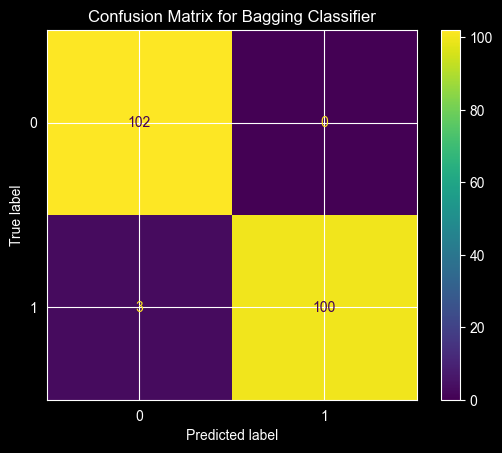

In [ ]:
cm = confusion_matrix(y_test, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_model.classes_)
disp.plot()
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()

### Boosting Classifier

We will now implement AdaBoost Classifier with Decision Trees as base estimators.

In [ ]:
boosting_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [ ]:
boosting_model = GridSearchCV(
    AdaBoostClassifier(
        DecisionTreeClassifier(),
    ),
    boosting_param_grid,
    verbose=1,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

boosting_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,AdaBoostClass...eClassifier())
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
# print the best parameters
print("Best Parameters for Boosting Classifier:", boosting_model.best_params_)

Best Parameters for Boosting Classifier: {'learning_rate': 0.01, 'n_estimators': 100}


In [ ]:
# evaluate the model
y_pred_boosting = boosting_model.predict(X_test)
print("\nBoosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_boosting))


Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# precision, recall, f1-score, accuracy
precision = precision_score(y_test, y_pred_boosting)
recall = recall_score(y_test, y_pred_boosting)
f1 = f1_score(y_test, y_pred_boosting)
accuracy = accuracy_score(y_test, y_pred_boosting)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


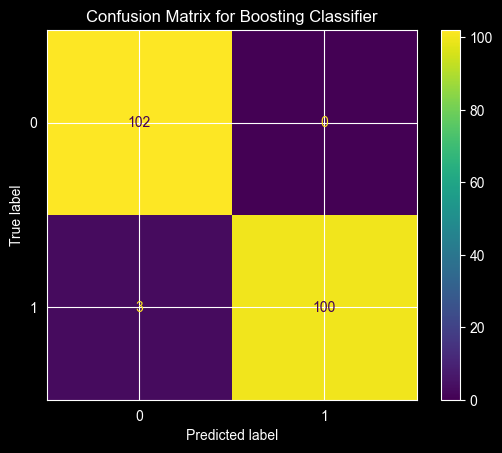

In [ ]:
cm = confusion_matrix(y_test, y_pred_boosting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=boosting_model.classes_)
disp.plot()
plt.title("Confusion Matrix for Boosting Classifier")
plt.show()

### Tree Based Models Summary

Both Bagging and Boosting classifiers demonstrated strong performance in predicting heart disease, with hyperparameter tuning significantly enhancing their effectiveness. The Bagging Classifier, leveraging multiple decision trees, provided robust predictions by reducing variance, while the Boosting Classifier focused on correcting errors from previous models, leading to improved accuracy. The confusion matrices and classification reports highlighted their strengths in recall, which is crucial for medical diagnoses. Overall, these ensemble methods proved to be powerful tools for this classification task, balancing accuracy and interpretability effectively.